On an 2 x 3 board, there are five tiles labeled from 1 to 5, and an empty square represented by 0. A move consists of choosing 0 and a 4-directionally adjacent number and swapping it.

The state of the board is solved if and only if the board is [[1,2,3],[4,5,0]].

Given the puzzle board board, return the least number of moves required so that the state of the board is solved. If it is impossible for the state of the board to be solved, return -1.

 

Example 1:

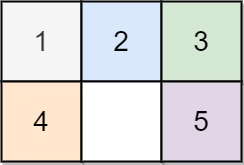

Input: board = [[1,2,3],[4,0,5]]
Output: 1
Explanation: Swap the 0 and the 5 in one move.

Example 2:

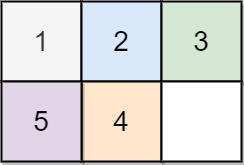

Input: board = [[1,2,3],[5,4,0]]
Output: -1
Explanation: No number of moves will make the board solved.

Example 3:

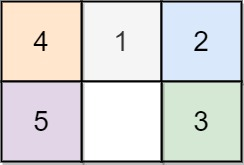

Input: board = [[4,1,2],[5,0,3]]
Output: 5
Explanation: 5 is the smallest number of moves that solves the board.
An example path:
After move 0: [[4,1,2],[5,0,3]]
After move 1: [[4,1,2],[0,5,3]]
After move 2: [[0,1,2],[4,5,3]]
After move 3: [[1,0,2],[4,5,3]]
After move 4: [[1,2,0],[4,5,3]]
After move 5: [[1,2,3],[4,5,0]]

 

Constraints:

    board.length == 2
    board[i].length == 3
    0 <= board[i][j] <= 5
    Each value board[i][j] is unique.



In [ ]:
class Solution:
    def slidingPuzzle(self, board: List[List[int]]) -> int:
        def arrhash(arr):
            return "".join(str(s) for s in arr[0]) + "".join(str(s) for s in arr[1])
        
        target = "123450"
        visited = set([arrhash(board)])

        q = deque([board])
        move = 0

        while q:
            n = len(q)
            for _ in range(n):
                curr_board = q.popleft()
                if arrhash(curr_board) == target:
                    return move
                for i in range(2):
                    for j in range(3):
                        if curr_board[i][j] == 0:
                            for di, dj in [
                                (0, -1), (0, 1), (-1, 0), (1, 0)
                            ]:
                                if 0 <= i + di < 2 and 0 <= j + dj < 3:
                                    new_board = [curr_board[0].copy(), curr_board[1].copy()]
                                    new_board[i][j], new_board[i + di][j + dj] = new_board[i + di][j + dj], new_board[i][j]
                                    boardhash = arrhash(new_board)
                                    if boardhash not in visited:
                                        visited.add(boardhash)
                                        q.append(new_board)
                            break
            move += 1
        return -1

In [ ]:
class Solution:
    def slidingPuzzle(self, board):
        # Direction map for zero's possible moves in a 1D representation of the 2x3 board
        directions = [
            [1, 3],
            [0, 2, 4],
            [1, 5],
            [0, 4],
            [1, 3, 5],
            [2, 4],
        ]

        # Helper method to swap characters at indices i and j in the string
        def _swap(state, i, j):
            state_list = list(state)
            state_list[i], state_list[j] = state_list[j], state_list[i]
            return "".join(state_list)

        target = "123450"
        start_state = "".join(str(num) for row in board for num in row)

        visited = set()  # To store visited states
        queue = deque([start_state])
        visited.add(start_state)

        moves = 0

        # BFS to find the minimum number of moves
        while queue:
            for _ in range(len(queue)):
                current_state = queue.popleft()

                # Check if we reached the target solved state
                if current_state == target:
                    return moves

                zero_pos = current_state.index("0")
                for new_pos in directions[zero_pos]:
                    next_state = _swap(current_state, zero_pos, new_pos)

                    # Skip if this state has been visited
                    if next_state in visited:
                        continue

                    # Mark the new state as visited and add it to the queue
                    visited.add(next_state)
                    queue.append(next_state)
            moves += 1

        return -1